In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models import Doc2Vec
from sklearn import utils
from sklearn.model_selection import train_test_split
import gensim
from sklearn.linear_model import LogisticRegression
from gensim.models.doc2vec import TaggedDocument
import re
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# df = pd.read_csv('Consumer_Complaints.csv')
# dff = df.sample(n = 10000)
# dff.to_csv('Compressed_complaint.csv')
# dff = df.sample(n = 4000)
# dff.to_csv('Compressed_complaint.csv')
# df = df[['Consumer Complaint','Product']]
# df = df[pd.notnull(df['Consumer Complaint'])]
# df.rename(columns = {'Consumer Complaint':'narrative'}, inplace = True)
# df.tail(10)

In [3]:
dff = pd.read_csv('Compressed_complaint.csv')
dff = dff[['Consumer Complaint','Product']]
dff = dff[pd.notnull(dff['Consumer Complaint'])]
dff.rename(columns = {'Consumer Complaint':'narrative'}, inplace = True)
dff.tail(10)

,narrative,Product
9965,I have sent several requests to Experian reque...,Credit reporting
9967,Doctor performed and billed me for unnapproved...,Debt collection
9969,Chase is attempting to collect a debt that I a...,Debt collection
9974,"New standards for how tax liens, civil judgmen...","Credit reporting, credit repair services, or o..."
9978,I made adjustments through the online dashboar...,Checking or savings account
9984,After reviewing my XXXX credit report I notice...,Consumer Loan
9988,If he credit reporting agency refused to send ...,"Credit reporting, credit repair services, or o..."
9991,Equifax mishandled my personal information inc...,"Credit reporting, credit repair services, or o..."
9994,On this date XXXX/XXXX/2016 ( see attached ). ...,Credit reporting
9996,XXXX XXXX sent Merchants and Medical my detail...,Debt collection


In [4]:
from gensim.models import Doc2Vec

In [5]:
text_corpus = dff.values.tolist()
node_subjects = []
for i in range(len(text_corpus)):
    node_subjects.append(text_corpus[i][1])
    i = i+1
print(node_subjects[1999])

Mortgage


In [6]:
dff.shape

(2738, 2)

In [7]:
dff.index = range(2738)
dff['narrative'].apply(lambda x: len(x.split(' '))).sum()

567126

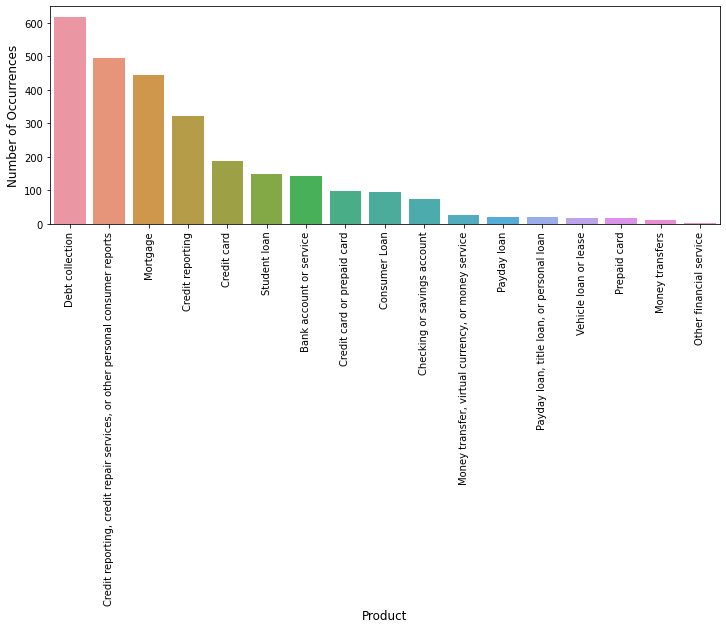

In [8]:
cnt_pro = dff['Product'].value_counts()
plt.figure(figsize=(12,4))
sns.barplot(data=dff, x=cnt_pro.index, y=cnt_pro.values)
# sns.barplot(cnt_pro.index, cnt_pro.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Product', fontsize=12)
plt.xticks(rotation=90)
plt.show();

In [9]:
def print_complaint(index):
    example = dff[dff.index == index][['narrative', 'Product']].values[0]
    if len(example) > 0:
        print(example[0])
        print('Product:', example[1])
print_complaint(9)

I completed paperwork to finalize a deed in lieu with Select Portfolio Servicing XX/XX/2016. regarding the property located at XXXX XXXX XXXX , XXXX Georgia XXXX. I requested a copy of the deed in lieu documents I signed XX/XX/XXXX and was told by XXXX XXXX of XXXX ( the third party used by Select Portfolio ) that I could not have a copy but I could take a picture of the documents. I then requested a copy of my signed deed in lieu documents from S.P.S but never received them. Instead, I was told that I will receive a copy of them after everything is completed. I am still waiting on the final walk through of the property. Select Portfolio said an inspector came by the property and and deemed some one was living in it. In the past, I had people to oversee and watch out for the property to keep it from being vandalized. I have removed any and all security measures as having a parked car in the driveway and a sign on the fence to give the appearance that some one is living there. I will no

In [10]:
print_complaint(1000)

Like many other Americans, I have voluntarily initiated security freezes on all of my credit profiles at Transunion, XXXX and XXXX. This helps me sleep better at night knowing a fraudster ca n't open an account in my name without my explicit permission. 

The complaint I have is that not only do I have to pay {$10.00} to these companies to initiate the freeze, I also have to pay {$10.00} to each XXXX separately, every time I want to apply for a credit product. In some cases I am forced to pay {$30.00} out of pocket. I take issue with this because the problem of identity theft is largely attributable to these very organizations who provide my financial information to anyone who asks for it, " willy-nilly '' without any sort of authentication or identity verification. So even though these companies are responsible for the problem, if I want to do something to prevent it ultimately I have to pay. 

I am requesting that the CFPB require, or simply encourage these companies to provide this 

In [11]:
from bs4 import BeautifulSoup
def cleanText(text):
    text = BeautifulSoup(text, "lxml").text
    text = re.sub(r'\|\|\|', r' ', text) 
    text = re.sub(r'http\S+', r'<URL>', text)
    text = text.lower()
    text = text.replace('x', '')
    return text
dff['narrative'] = dff['narrative'].apply(cleanText)

/usr/lib/python3/dist-packages/bs4/__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


In [12]:
# j = 0
# for i in text_corpus:
#     text_corpus[j] = str(i[0]) +" " + str(i[1]) 
#     text_corpus[j] = re.split('; |, |' ' |\n', text_corpus[j])
#     j = j + 1

j = 0
for i in text_corpus:
    text_corpus[j] = i[0] +" " + i[1] 
    text_corpus[j] = re.split('; |, |' ' |\n', text_corpus[j])
    j = j + 1

In [13]:
print(text_corpus[1])
print(len(text_corpus))

['I', 'would', 'like', 'to', 'register', 'a', 'complaint', 'against', 'PNC', 'Mortgage', 'and', 'Insurance.', 'I', 'settled', 'on', 'a', 'new', 'property', 'on', 'XXXX', 'XXXX', '2016.', 'The', 'loan', 'was', 'held', 'with', 'Fairway', 'mortgage', 'and', 'later', 'bought', 'by', 'PNC', 'Mortgage', 'on', 'XXXX', 'XXXX', '2016.', 'On', 'XXXX', 'XXXX', '2016', 'I', 'was', 'notified', 'that', 'my', 'home', 'was', 'now', 'located', 'in', 'a', 'flood', 'plain', 'and', 'required', 'flood', 'insurance', 'which', 'they', 'were', 'going', 'to', 'purchase', 'for', 'me', 'if', 'I', 'did', 'not', 'show', 'proof', 'of', 'coverage', 'in', '45', 'days.', 'I', 'reached', 'out', 'to', 'multiple', 'insurance', 'companies', 'and', 'was', 'told', 'that', 'I', 'could', 'purchase', 'the', 'flood', 'insurance', 'because', 'I', 'was', 'no', 'in', 'a', 'flood', 'zone', 'as', 'PNC', 'mentioned.', 'PNC', 'stated', 'I', 'was', 'in', 'flood', 'zone', 'A', 'and', 'the', 'FEMA', 'database', 'had', 'me', 'listed', 'in

In [14]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import gensim

def tagged_document(lis_of_list_of_words):
    for i, list_of_words in enumerate(lis_of_list_of_words):
        yield gensim.models.doc2vec.TaggedDocument(list_of_words, [i])

data_for_training = list(tagged_document(text_corpus))   
print(data_for_training[100])


TaggedDocument<['The', 'company', 'that', 'is', 'servicing', 'my', 'loan', '(', 'Shellpoint', ')', 'holds', 'money', 'in', 'an', 'escrow', 'account.', 'They', 'are', 'supposed', 'to', 'disburse', 'my', 'property', 'taxes', 'and', 'homeowner', "'s", 'insurance', 'from', 'this', 'account', 'when', 'due', 'but', 'so', 'far', 'they', 'have', 'not', 'done', 'so.', 'The', 'XXXX', 'XXXX', 'County', 'tax', 'collector', 'website', 'currently', 'shows', 'my', 'tax', 'as', 'past', 'due', 'and', 'my', 'XXXX', 'insurance', 'agent', 'says', 'a', 'payment', 'has', 'not', 'been', 'received', 'which', 'would', 'essentially', 'mean', 'my', 'home', 'is', 'no', 'longer', 'insured.', 'I', 'have', 'called', 'them', 'repeatedly', 'to', 'discuss', 'this', 'situation', 'and', 'no', 'action', 'has', 'taken', 'place.', 'How', 'can', 'they', 'hold', 'my', 'funds', 'and', 'not', 'make', 'these', 'scheduled', 'disbursement', 'the', 'result', 'of', 'which', 'is', 'increased', 'risk', 'to', 'me.', 'Mortgage'], [100]>

In [15]:
data_for_training[100]

TaggedDocument(words=['The', 'company', 'that', 'is', 'servicing', 'my', 'loan', '(', 'Shellpoint', ')', 'holds', 'money', 'in', 'an', 'escrow', 'account.', 'They', 'are', 'supposed', 'to', 'disburse', 'my', 'property', 'taxes', 'and', 'homeowner', "'s", 'insurance', 'from', 'this', 'account', 'when', 'due', 'but', 'so', 'far', 'they', 'have', 'not', 'done', 'so.', 'The', 'XXXX', 'XXXX', 'County', 'tax', 'collector', 'website', 'currently', 'shows', 'my', 'tax', 'as', 'past', 'due', 'and', 'my', 'XXXX', 'insurance', 'agent', 'says', 'a', 'payment', 'has', 'not', 'been', 'received', 'which', 'would', 'essentially', 'mean', 'my', 'home', 'is', 'no', 'longer', 'insured.', 'I', 'have', 'called', 'them', 'repeatedly', 'to', 'discuss', 'this', 'situation', 'and', 'no', 'action', 'has', 'taken', 'place.', 'How', 'can', 'they', 'hold', 'my', 'funds', 'and', 'not', 'make', 'these', 'scheduled', 'disbursement', 'the', 'result', 'of', 'which', 'is', 'increased', 'risk', 'to', 'me.', 'Mortgage'], 

In [16]:
model = gensim.models.doc2vec.Doc2Vec(vector_size=300, min_count=2, epochs=40)
model.build_vocab(data_for_training)

In [17]:
# model.train(data_for_training, total_examples=model.corpus_count, epochs=model.epochs)
# model.save("doc2vec15.model")

In [18]:
# Load pre-trained Word2Vec model.
import gensim
model = gensim.models.Word2Vec.load("doc2vec15.model")

In [19]:
model.dv.most_similar(1999)

[(1463, 0.6195583343505859),
 (2325, 0.6070816516876221),
 (1935, 0.5426657199859619),
 (1494, 0.540810227394104),
 (1123, 0.5375649333000183),
 (1113, 0.5192420482635498),
 (229, 0.5152484774589539),
 (2432, 0.5150371193885803),
 (1756, 0.5121184587478638),
 (2277, 0.5118690133094788)]

In [20]:
vector = model.dv
model.dv[142].shape

(300,)

In [21]:
len(vector)

2738

In [22]:
# Retrieve node embeddings and corresponding subjects
node_ids = model.dv.index_to_key  # list of node IDs
node_embeddings = (
    model.dv.vectors
)  # numpy.ndarray of size number of nodes times embeddings dimensionality
node_targets = node_subjects

In [23]:
# Apply t-SNE transformation on node embeddings
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
node_embeddings_2d = tsne.fit_transform(node_embeddings)

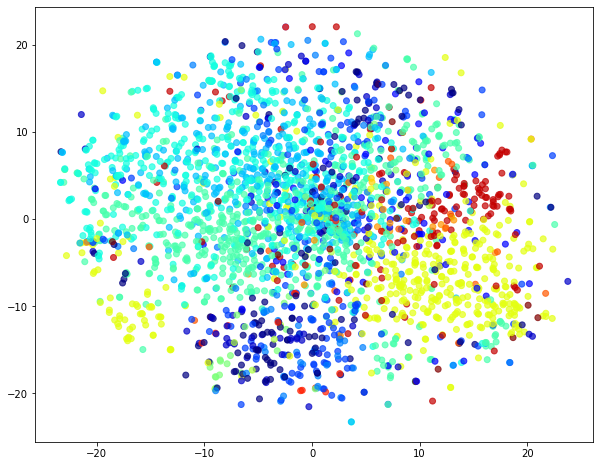

In [24]:
# draw the points
alpha = 0.7
label_map = {l: i for i, l in enumerate(np.unique(node_targets))}
node_colours = [label_map[target] for target in node_targets]

plt.figure(figsize=(10, 8))
plt.scatter(
    node_embeddings_2d[:, 0],
    node_embeddings_2d[:, 1],
    c=node_colours,
    cmap="jet",
    alpha=alpha,
)

In [25]:
X = node_embeddings
X[1:100]


array([[-1.45939708e-01,  1.48278987e+00,  3.87842417e-01, ...,
        -6.90191448e-01,  6.26024365e-01,  5.98202705e-01],
       [ 2.31533781e-01,  1.87173367e-01, -8.27906877e-02, ...,
        -1.97954759e-01,  4.74055223e-02,  1.14025222e-02],
       [ 3.60279568e-02,  4.94097263e-01, -4.89802212e-01, ...,
         6.82793915e-01,  3.03658862e-02,  1.19451165e-01],
       ...,
       [ 4.33243245e-01,  1.21445286e+00, -8.31377268e-01, ...,
         4.24325854e-01,  2.60760754e-01, -3.56694087e-02],
       [ 1.69356018e-01,  6.66840732e-01,  3.09684157e-01, ...,
        -3.13051671e-01,  4.78452533e-01,  1.00641031e-04],
       [ 1.45029366e-01,  2.06018060e-01, -1.42173812e-01, ...,
        -2.05262169e-01,  1.52986154e-01, -5.19640706e-02]], dtype=float32)

In [26]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)




# setting distance_threshold=0 ensures we compute the full tree.
modelCluster = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

modelCluster = modelCluster.fit(X)


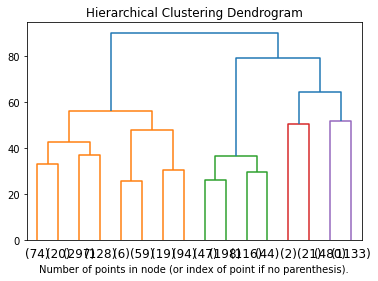

In [27]:
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(modelCluster, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [28]:
# setting distance_threshold=0 ensures we compute the full tree.
modelCluster = AgglomerativeClustering(distance_threshold=50, n_clusters=None)

model1 = modelCluster.fit(X)

In [29]:
labels = model1.labels_.tolist()
nocluster = set(labels)
totalcluster = len(nocluster)
totalcluster

7

In [30]:
cluster_dict = {}

i = 0
for i in range(len(labels)):
    if labels[i] not in cluster_dict.keys():
         cluster_dict[labels[i]] = [i]
    else:
          cluster_dict[labels[i]].append(i)
    i+=1

In [31]:
vb = []
X[cluster_dict[0]]
cluster_dict[0]
X[[5, 88, 22]]

array([[ 0.8390434 , -0.777153  , -0.2137253 ,  0.25086084,  0.3188345 ,
        -0.6186368 ,  0.17879488,  0.35233065, -0.15861069,  0.3626207 ,
        -0.8159051 , -0.464383  , -0.1513868 , -0.11012281,  0.0285353 ,
        -0.81615615,  0.26839992, -0.23659317,  0.1855943 , -0.41152838,
        -0.07131229,  0.9072694 ,  0.28722402,  0.38082415,  0.45126846,
        -1.0714637 , -0.66334206,  0.26251388, -0.48006916, -0.37979585,
         0.41328156,  0.07962502, -0.0063087 ,  0.67102784, -0.08838038,
         0.01618031, -0.10352966, -0.22826882, -0.17141393,  0.06867008,
         0.36225668,  0.26341125,  0.56799924, -0.6350681 ,  0.26414004,
         0.8914171 ,  0.10854769,  0.41615143,  0.2606707 ,  0.3670176 ,
        -0.12609383,  0.81615484, -0.1095412 , -0.11311016,  0.35637358,
        -0.14132307,  0.08323842, -0.522719  ,  0.6589096 , -0.29224077,
         0.284789  ,  0.62797827, -0.04546833, -0.00943643,  0.6000094 ,
        -0.04519974,  0.71015346,  0.19521333, -0.0

In [32]:
for i in range(totalcluster):
    print(len(cluster_dict[i]))

178
1133
2
21
519
480
405


In [33]:
outlier_cluster_list = []
for i in range(totalcluster):
    if len(cluster_dict[i]) <= 2:
        outlier_cluster_list.append(i)
    
print(outlier_cluster_list)

[2]


In [34]:
# X[cluster_dict[outlier_cluster_list[0]]]

In [35]:
cluster_dict[outlier_cluster_list[0]]


[70, 1520]

In [36]:
# X[779]

In [41]:
cluster_mean = np.zeros((totalcluster, vector[1].size))

# for i in range(totalcluster):
#     cluster_mean[i] = np.mean(X[cluster_dict[i]], axis=0)
    
# cluster_mediod = np.zeros((totalcluster, X.iloc[1].size))
# cluster_mediod.shape
from sklearn_extra.cluster import KMedoids
cluster_mean = []

GetMedoid = lambda vX: KMedoids(n_clusters=1).fit(vX).cluster_centers_
for i in range(totalcluster):
    cluster_mean.append(GetMedoid(X[cluster_dict[i]])[0])

In [62]:
cluster_mean[2]
aa = np.where(X == cluster_mean[2])
aa

(array([70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70,
        70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70,
        70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70,
        70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70,
        70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70,
        70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70,
        70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70,
        70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70,
        70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70,
        70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70,
        70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70,
        70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70,
        70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70,
        70, 

In [43]:
cluster_mean[2]
X[cluster_dict[2][1]]

array([-1.49849892e+00, -2.66161919e+00, -2.03957486e+00, -1.32470679e+00,
        2.95331073e+00, -1.61344242e+00,  2.81993270e-01,  2.52100301e+00,
        5.16235471e-01,  1.23624361e+00, -4.36354995e-01,  9.90009606e-02,
       -3.47574544e+00, -3.84510934e-01, -4.19718885e+00, -3.59373665e+00,
       -3.89255023e+00,  2.43183732e+00, -3.69609046e+00,  1.09384120e+00,
        4.45708573e-01,  2.11384201e+00,  2.27049851e+00,  4.65869278e-01,
       -1.54293096e+00, -9.62609768e-01, -4.01320601e+00,  1.99263918e+00,
       -3.12313581e+00, -4.08117056e+00, -2.28701782e+00, -1.34308517e+00,
        2.03817630e+00,  4.95422393e-01, -3.74887045e-03,  3.37792218e-01,
       -6.55193710e+00, -2.91714382e+00, -9.43089724e-01,  1.44149292e+00,
        2.64028573e+00, -1.57314432e+00,  6.05669260e-01, -2.53927279e+00,
        6.11428559e-01,  3.17662954e+00,  1.40260506e+00, -7.40961909e-01,
        6.62353456e-01, -2.44507933e+00, -2.05632257e+00, -1.30366683e+00,
        4.07050180e+00,  

In [44]:
# from scipy.spatial import distance
# cluster_distance = []
# for i in range(totalcluster):
#     if i == outlier_cluster[0]:
#         continue
#     cluster_distance.append((distance.euclidean(cluster_mean[outlier_cluster[0]], cluster_mean[i]),outlier_cluster[0], i))

# print('Distance,    outlier, other-cluster')
# cluster_distance


# outlier need to change here for differnet experiment

from scipy.spatial import distance
outlier_cluster = outlier_cluster_list[0]
cluster_distance = []
for i in range(totalcluster):
    if i == outlier_cluster:
        continue
    cluster_distance.append((distance.euclidean(cluster_mean[outlier_cluster], cluster_mean[i]),outlier_cluster, i))
print('Euclidian distancce, Outlire, Other cluster')
cluster_distance

Euclidian distancce, Outlire, Other cluster


[(29.60603904724121, 2, 0),
 (30.33919334411621, 2, 1),
 (30.45966911315918, 2, 3),
 (30.381433486938477, 2, 4),
 (31.04569435119629, 2, 5),
 (30.230443954467773, 2, 6)]

In [45]:
cluster_distance.sort(key=lambda y: y[0])
cluster_distance = cluster_distance[:5]
cluster_distance

[(29.60603904724121, 2, 0),
 (30.230443954467773, 2, 6),
 (30.33919334411621, 2, 1),
 (30.381433486938477, 2, 4),
 (30.45966911315918, 2, 3)]

In [46]:
k_nearest_cluster = list(zip(*cluster_distance[:5]))[2]
k_nearest_cluster

(0, 6, 1, 4, 3)

In [47]:
  def findCandidateClusters(k_nearest_cluster):
    closestCluster = k_nearest_cluster[0][2]
    closestDistance = k_nearest_cluster[0][0]
    candidateCluster = []
    rejectedCluster = []
    dist = distance.euclidean(cluster_mean[closestCluster],cluster_mean[k_nearest_cluster[0][1]])
#     print(dist)
    candidateCluster.append(k_nearest_cluster[0])
    for i in k_nearest_cluster:
        if i in rejectedCluster:
            print('rejected')
            print(rejectedCluster)
            continue
        for j in k_nearest_cluster:
            if j == i: continue
            dist_btwn = distance.euclidean(cluster_mean[i[2]],cluster_mean[j[2]])
            origin = cluster_mean[i[2]] + (- cluster_mean[i[2]])
            translate_outlier = cluster_mean[i[1]] + (- cluster_mean[i[2]])
            translate_cluster = cluster_mean[j[2]] + (- cluster_mean[i[2]])
            cos_dist = distance.cosine(translate_outlier, translate_cluster)
            print(dist_btwn)
            print(cos_dist)
            print(j)
            print('')
            if cos_dist < 1  :
                if j in candidateCluster:
                    continue
                candidateCluster.append(j)
            else:
                if j not in rejectedCluster:
                    rejectedCluster.append(j)
                if j in candidateCluster:
                    print(j)
                    print('is included') 
                    candidateCluster.remove(j)   
                    
    for i in rejectedCluster:
        if i in candidateCluster:
            print(i)
            candidateCluster.remove(i)

    return  candidateCluster   

In [48]:
neighborCluster = findCandidateClusters(cluster_distance)
neighborCluster

5.957548141479492
1.00530069693923
(30.230443954467773, 2, 6)

5.4889302253723145
1.04252390563488
(30.33919334411621, 2, 1)

5.3523383140563965
1.0563748963177204
(30.381433486938477, 2, 4)

12.095355987548828
0.8673206716775894
(30.45966911315918, 2, 3)

rejected
[(30.230443954467773, 2, 6), (30.33919334411621, 2, 1), (30.381433486938477, 2, 4)]
rejected
[(30.230443954467773, 2, 6), (30.33919334411621, 2, 1), (30.381433486938477, 2, 4)]
rejected
[(30.230443954467773, 2, 6), (30.33919334411621, 2, 1), (30.381433486938477, 2, 4)]
12.095355987548828
0.7318668365478516
(29.60603904724121, 2, 0)

11.316232681274414
0.7940623462200165
(30.230443954467773, 2, 6)

11.713234901428223
0.7974603772163391
(30.33919334411621, 2, 1)

11.658255577087402
0.8019259870052338
(30.381433486938477, 2, 4)

(30.230443954467773, 2, 6)
(30.33919334411621, 2, 1)
(30.381433486938477, 2, 4)


[(29.60603904724121, 2, 0), (30.45966911315918, 2, 3)]

In [67]:
cluster_mean[2]
aa = np.where(X == cluster_mean[6])
aa

(array([480, 480, 480, 480, 480, 480, 480, 480, 480, 480, 480, 480, 480,
        480, 480, 480, 480, 480, 480, 480, 480, 480, 480, 480, 480, 480,
        480, 480, 480, 480, 480, 480, 480, 480, 480, 480, 480, 480, 480,
        480, 480, 480, 480, 480, 480, 480, 480, 480, 480, 480, 480, 480,
        480, 480, 480, 480, 480, 480, 480, 480, 480, 480, 480, 480, 480,
        480, 480, 480, 480, 480, 480, 480, 480, 480, 480, 480, 480, 480,
        480, 480, 480, 480, 480, 480, 480, 480, 480, 480, 480, 480, 480,
        480, 480, 480, 480, 480, 480, 480, 480, 480, 480, 480, 480, 480,
        480, 480, 480, 480, 480, 480, 480, 480, 480, 480, 480, 480, 480,
        480, 480, 480, 480, 480, 480, 480, 480, 480, 480, 480, 480, 480,
        480, 480, 480, 480, 480, 480, 480, 480, 480, 480, 480, 480, 480,
        480, 480, 480, 480, 480, 480, 480, 480, 480, 480, 480, 480, 480,
        480, 480, 480, 480, 480, 480, 480, 480, 480, 480, 480, 480, 480,
        480, 480, 480, 480, 480, 480, 480, 480, 480

In [63]:
bb = [70, 1794, 640, 480]

[70, 1520]

In [97]:
cluster_dict[6]

[8,
 16,
 30,
 35,
 38,
 48,
 80,
 96,
 108,
 117,
 119,
 122,
 124,
 130,
 136,
 137,
 171,
 172,
 180,
 183,
 187,
 196,
 209,
 213,
 220,
 225,
 227,
 239,
 254,
 256,
 273,
 274,
 282,
 289,
 292,
 294,
 309,
 318,
 326,
 327,
 352,
 353,
 356,
 357,
 358,
 361,
 369,
 375,
 380,
 390,
 394,
 398,
 406,
 418,
 420,
 421,
 422,
 431,
 433,
 457,
 459,
 467,
 477,
 478,
 479,
 480,
 483,
 492,
 525,
 535,
 538,
 546,
 554,
 558,
 564,
 565,
 570,
 580,
 597,
 627,
 636,
 642,
 650,
 653,
 658,
 663,
 682,
 686,
 691,
 706,
 708,
 712,
 715,
 722,
 727,
 738,
 740,
 741,
 747,
 752,
 761,
 776,
 777,
 781,
 794,
 798,
 806,
 815,
 821,
 823,
 830,
 835,
 854,
 863,
 867,
 874,
 875,
 883,
 884,
 887,
 904,
 907,
 917,
 927,
 930,
 935,
 936,
 946,
 953,
 968,
 983,
 1005,
 1017,
 1018,
 1030,
 1039,
 1042,
 1043,
 1046,
 1051,
 1055,
 1056,
 1063,
 1068,
 1070,
 1077,
 1081,
 1099,
 1109,
 1115,
 1123,
 1124,
 1134,
 1135,
 1151,
 1153,
 1157,
 1158,
 1161,
 1176,
 1177,
 1192,
 1194,

In [149]:
dff.loc[cluster_dict[6][18]]

narrative    i signed up for a citigold checking account wh...
Product                                Bank account or service
Name: 180, dtype: object

In [146]:
X[cluster_dict[0]]
for i in range(len(cluster_dict[0])):
    

SyntaxError: incomplete input (1011566501.py, line 3)

In [49]:
tsne_vec = []
y = []
# tsne_vec.append(X[[cluster_dict[0]]])
# tsne_vec.append(X[[cluster_dict[2]]])
# tsne_vec.append(X[[cluster_dict[3]]])
# tsne_vec = np.array(tsne_vec)
# tsne_vec.shape
# y = ['1','2','3','4']

In [52]:
for i in (cluster_dict[3]):
    tsne_vec.append(X[i])
    y.append('3')
   

In [55]:
tsne_vec[1]

array([-6.37677491e-01,  3.90281886e-01,  8.46416280e-02, -9.50574398e-01,
        4.03213024e-01, -1.09848511e+00, -1.13783896e+00,  2.49971700e+00,
        5.78955889e-01,  2.58150455e-02, -3.83748502e-01, -1.55012146e-01,
        1.93833381e-01,  1.11075222e+00, -1.91484407e-01, -7.40444899e-01,
       -2.20985934e-01,  2.24803492e-01, -4.10567790e-01,  2.35672593e-01,
       -9.19004679e-01, -6.34979188e-01, -4.34836596e-01,  1.04283023e+00,
       -7.60564134e-02, -5.96742809e-01, -4.53765064e-01, -2.05696613e-01,
        3.39566082e-01, -9.02375460e-01,  1.31010437e+00, -7.07056224e-01,
       -4.69699621e-01,  3.39139879e-01,  6.25208437e-01,  8.97382572e-02,
        5.93142271e-01, -1.75370824e+00, -7.30174661e-01, -6.60052523e-02,
        2.60617644e-01, -5.07073343e-01,  1.02709971e-01,  5.50587714e-01,
        4.86975133e-01, -3.91520977e-01, -2.29374498e-01, -6.71462715e-01,
       -4.38468844e-01, -1.75277621e-01, -5.02193630e-01,  2.71381959e-02,
        6.24189496e-01, -

In [ ]:
for i in tsne_vec:
    model.dv.similarity(22,2)

In [53]:
tsne_vec = np.array(tsne_vec)
tsne_vec.shape

(201, 300)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 201 samples in 0.001s...
[t-SNE] Computed neighbors for 201 samples in 0.047s...
[t-SNE] Computed conditional probabilities for sample 201 / 201
[t-SNE] Mean sigma: 3.543752
[t-SNE] KL divergence after 250 iterations with early exaggeration: 81.602310
[t-SNE] KL divergence after 1000 iterations: 0.894678


[Text(0.5, 1.0, 'Consumer Complaint data T-SNE projection')]

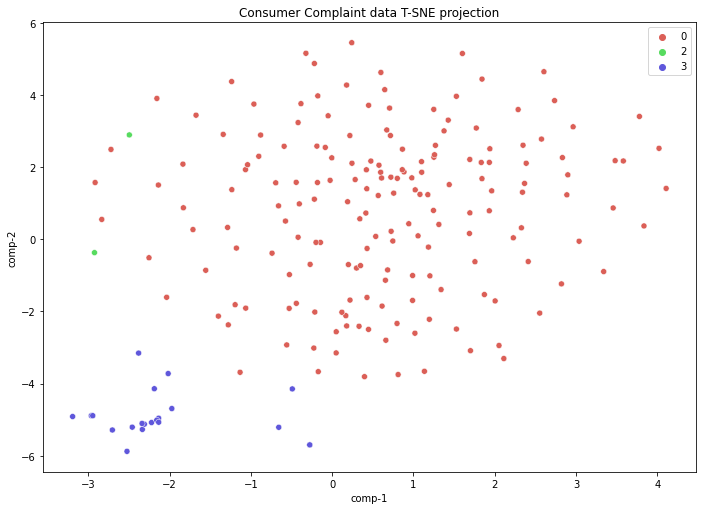

In [54]:
from sklearn.manifold import TSNE
from numpy import reshape
import seaborn as sns
import pandas as pd  

tsne = TSNE(n_components=2, perplexity= 30, verbose=1, random_state=123)

z = tsne.fit_transform(tsne_vec) 


df = pd.DataFrame()
df["y"] = y
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]
plt.gcf().set_size_inches(11.7, 8.27)

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 3),
                data=df).set(title="Consumer Complaint data T-SNE projection") 

In [77]:
bb = [70, 1794, 640, 480]

model.dv.similarity(70,640)

0.22335424

In [78]:
print_complaint(640)

please accept this final written offer of settlement before litigation as my attempt to amicably resolve your continued willful violation of the fair credit reporting act regarding your refusal to delete all of the unverified account information from my consumer file. despite my three written requests, the unverified items listed below still remain on my credit report in violation of federal law. in the results of your re-investigations, you stated to the creditor bureaus that you verified that these items are being reported correctly? you still have not identified who in your company verified the accuracy of these accounts or how they verified them? as previously pointed out to you,  law dictionary, 6th edition, 1990, defines verification as, confirmation of correctness, truth or authenticity, by affidavit, oath, or deposition. affidavit of truth of a matter stated and object of verification is to assure good faith in averments or statements of a party. what this means is that your co

In [ ]:
def findNearestObjectOfClusters(k_nearest_cluster):
    distance_all_cluster = []
    nearestObjects = []
    object_distance = []
    for j in range(len(k_nearest_cluster)):
        for i in range(len(cluster_dict[k_nearest_cluster[j]])):
            object_distance.append((distance.euclidean(cluster_mean[outlier_cluster[0]], X[cluster_dict[k_nearest_cluster[j]][i]]),outlier_cluster[0], k_nearest_cluster[j],  cluster_dict[k_nearest_cluster[j]][i]))
        #distance_all_cluster.append(object_distance)
        nearestObjects.append(min(object_distance, key=lambda tup: tup[0]))
        object_distance = []
    return  nearestObjects   

In [ ]:
nearestObjects = findNearestObjectOfClusters(k_nearest_cluster)
nearestObjects.sort(key=lambda y: y[0])
nearestObjects

In [ ]:
from scipy.spatial import distance
distance.cosine(X[1], X[28])

In [ ]:
def findCandidateObjectOfClusters(k_nearest_objects):
    closestObject = k_nearest_objects[0][3]
    closestDistance = k_nearest_objects[1][0]
    candidateObjects = []
    candidateObjects.append(k_nearest_objects[0])
    for j in range(len(k_nearest_objects)):
        #if j == 0: continue
        dist = distance.euclidean(X[closestObject], X[k_nearest_objects[j][3]])
        cos_dist = distance.cosine(X[closestObject], X[k_nearest_objects[j][3]])
        print(dist)
        if cos_dist >= 1 and dist  >=  closestDistance :
            candidateObjects.append(k_nearest_objects[j])
    return  candidateObjects   

In [ ]:
neighborObjects = findCandidateObjectOfClusters(nearestObjects)
neighborObjects

In [ ]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=10, centers=3, n_features=2,random_state=0)